In [ ]:
# Atividade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Dados 1

In [ ]:
#Lendo dados
dados = pd.read_csv("/content/drive/MyDrive/51 Data Science: testando relações com Regressão Linear/Preços_de_casas.csv")
dados = dados.drop(columns = "Id")

# Correlação
corr = dados.corr()

# Quais fatores estão mais correlacionados?

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

In [ ]:
dados

,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,79.5224,1,79.3366,2,548,0,1027905.00
1,117.2398,0,0.0000,2,460,0,894795.00
2,85.4680,1,80.4514,2,608,0,1101855.00
3,89.2769,1,70.2324,1,642,0,690200.00
4,106.3705,1,97.8237,2,836,0,1232500.00
...,...,...,...,...,...,...,...
1433,88.5337,1,64.4726,2,460,0,862750.00
1434,192.5817,0,0.0000,2,500,0,1035300.00
1435,110.3652,1,107.0208,2,252,0,1313845.00
1436,100.1462,0,0.0000,1,240,0,700676.25


In [ ]:
y = dados['preco_de_venda']
x = dados.drop(columns = 'preco_de_venda')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 230)

df_train = pd.DataFrame(data = x_train)
df_train['preco_de_venda'] = y_train

x_train = sm.add_constant(x_train)

# mesmo modelo_3 das aulas
modelo_3 = sm.OLS(y_train,
                  x_train[['const', 'area_primeiro_andar', 'existe_segundo_andar',
                          'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']]).fit()

modelo_3.params

const                            -129979.678094
area_primeiro_andar                 6119.653184
existe_segundo_andar              221306.959705
quantidade_banheiros              149036.289458
qualidade_da_cozinha_Excelente    444391.228573
dtype: float64

In [ ]:
x_test = sm.add_constant(x_test)

predict_3 = modelo_3.predict(x_test[['const', 'area_primeiro_andar', 'existe_segundo_andar',
                         'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']])

In [ ]:
modelo_3.rsquared

0.6511289354898803

In [ ]:
print("R²: ", r2_score(y_test, predict_3))

R²:  0.6432078074497706


In [ ]:
novo_imovel = pd.DataFrame({'const': [1],
                            'area_primeiro_andar': [98],
                            'existe_segundo_andar': [0],
                            'quantidade_banheiros': [1],
                            'qualidade_da_cozinha_Excelente': [1]
})

print(modelo_3.predict(novo_imovel)[0])

1063173.8519646404


# Dados 2

In [ ]:
dados_2 = pd.read_csv("/content/drive/MyDrive/51 Data Science: testando relações com Regressão Linear/hoteis.csv")
dados_2

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087
...,...,...,...,...
995,5,11.277836,2,374.823064
996,4,8.811311,2,323.147993
997,2,10.329892,4,409.372235
998,2,9.239120,3,434.881278


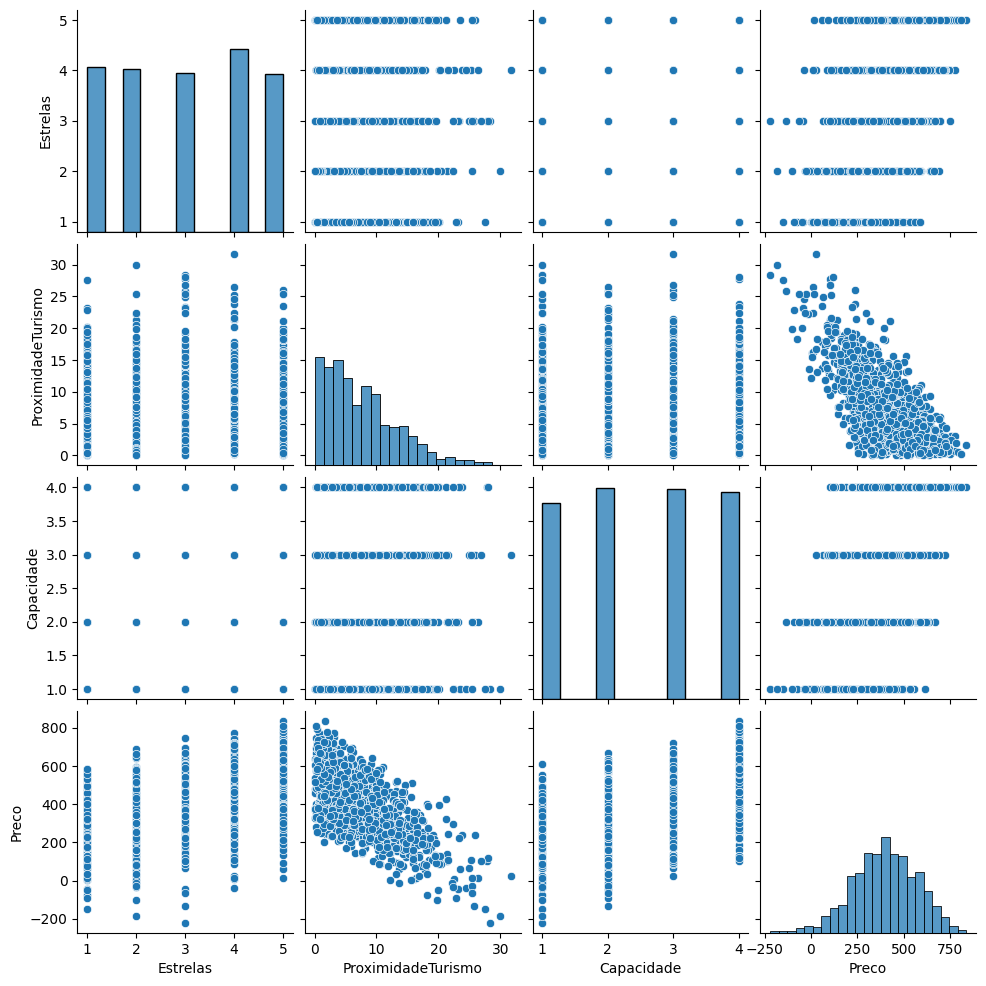

In [ ]:
sns.pairplot(dados_2)

In [ ]:
dados_2.columns

Index(['Estrelas', 'ProximidadeTurismo', 'Capacidade', 'Preco'], dtype='object')

In [ ]:
x = dados_2.drop(columns = 'Preco')
y = dados_2['Preco']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 230)

df_train = pd.DataFrame(data = x_train)
df_train['Preco'] = y_train

modelo_0 = ols('Preco ~ Estrelas', data = df_train).fit()

x_train = sm.add_constant(x_train)

modelo_1 = sm.OLS(y_train,
                  x_train[['const', 'Estrelas', 'ProximidadeTurismo', 'Capacidade']]).fit()

modelo_2 = sm.OLS(y_train,
                  x_train[['const', 'Estrelas', 'Capacidade']]).fit()

modelo_3 = sm.OLS(y_train,
                  x_train[['const','ProximidadeTurismo', 'Capacidade']]).fit()

In [ ]:
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     128.0
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           2.27e-27
Time:                        19:00:37   Log-Likelihood:                -4533.1
No. Observations:                 700   AIC:                             9070.
Df Residuals:                     698   BIC:                             9079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    254.5755     14.302     17.800      0.0

In [ ]:
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     2828.
Date:                Thu, 11 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:00:44   Log-Likelihood:                -3689.2
No. Observations:                 700   AIC:                             7386.
Df Residuals:                     696   BIC:                             7405.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                195.1576      6

In [ ]:
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     281.1
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           3.01e-90
Time:                        19:00:49   Log-Likelihood:                -4385.0
No. Observations:                 700   AIC:                             8776.
Df Residuals:                     697   BIC:                             8790.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.4104     16.170      2.375      0.0

In [ ]:
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     1066.
Date:                Thu, 11 Jul 2024   Prob (F-statistic):          9.00e-213
Time:                        19:00:54   Log-Likelihood:                -4101.7
No. Observations:                 700   AIC:                             8209.
Df Residuals:                     697   BIC:                             8223.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                355.0018      9

In [ ]:
print("R²")
print("Modelo 0: ", modelo_0.rsquared)
print("Modelo 1: ", modelo_1.rsquared)
print("Modelo 2: ", modelo_2.rsquared)
print("Modelo 3: ", modelo_3.rsquared)

R²
Modelo 0:  0.15499226890449191
Modelo 1:  0.9241850901112033
Modelo 2:  0.44649104153622876
Modelo 3:  0.7536532740101605


# Dados 3

In [ ]:
dados_3 = pd.read_csv("/content/drive/MyDrive/51 Data Science: testando relações com Regressão Linear/usina.csv")
dados_3

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [ ]:
y = dados_3['PE']
x = dados_3.drop(columns = 'PE')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 230)

df_train = pd.DataFrame(data = x_train)
df_train['PE'] = y_train

x_train = sm.add_constant(x_train)

modelo_0 = sm.OLS(y_train,
                  x_train[['const', 'AT', 'V', 'AP', 'RH']]).fit()

modelo_0.params

const    446.104172
AT        -1.960745
V         -0.241288
AP         0.070242
RH        -0.153685
dtype: float64

In [ ]:
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.191e+04
Date:                Fri, 12 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:12:42   Log-Likelihood:                -19662.
No. Observations:                6697   AIC:                         3.933e+04
Df Residuals:                    6692   BIC:                         3.937e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        446.1042     11.769     37.905      0.0

In [ ]:
explicativas_0 = ['const', 'AT', 'V', 'AP', 'RH']

vif_0 = pd.DataFrame()
vif_0['variavel'] = explicativas_0

vif_0['vif'] = [
    variance_inflation_factor(x_train[explicativas_0].values, i) for i in range(len(explicativas_0))]

vif_0

,variavel,vif
0,const,44603.788615
1,AT,6.034363
2,V,3.954998
3,AP,1.468530
4,RH,1.717508


In [ ]:
y_previsto_train = modelo_0.predict(x_train)

fig = px.scatter(x = y_previsto_train, y = y_train,
                 title = 'Previsão X Real',
                 labels = {'x': 'PE previsto','y': 'PE real'})
fig.show()

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='PE - Previsão', ylabel='Resíduos'>

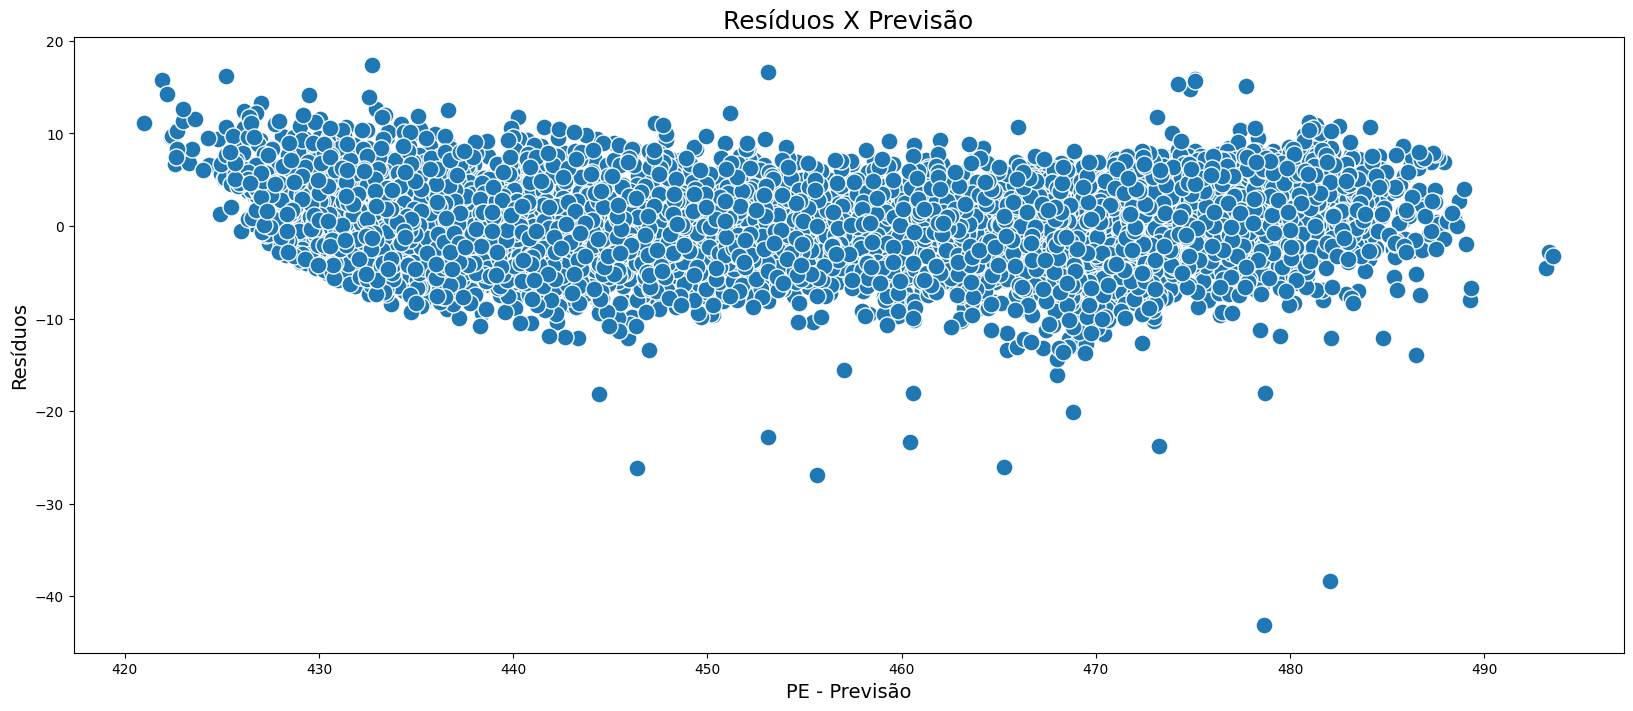

In [ ]:
residuos = modelo_0.resid

ax = sns.scatterplot(x = y_previsto_train, y = residuos, s = 150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize = 18)
ax.set_xlabel('PE - Previsão', fontsize = 14)
ax.set_ylabel('Resíduos', fontsize=14)
ax